# 3회차: 추정과 가설검정

## 목차

| 순서 | 파트   | 주제                | 핵심 내용                                            |
|------|--------|---------------------|------------------------------------------------------|
| 1    | Part 1 | 핵심 정리           | 추정 vs 가설검정, 핵심 수식, 용어 정리               |
| 2    | Part 2 | 표본분포와 중심극한정리 | 표본추출, 표본평균의 분포, CLT, 표준오차             |
| 3    | Part 3 | 통계적 추정         | 점추정, 구간추정, 신뢰구간, 표본크기 결정            |
| 4    | Part 4 | 가설검정 기초       | 귀무/대립가설, p-value, 유의수준, 판정 규칙          |
| 5    | Part 5 | 주요 검정 방법      | z-검정, 단일표본/독립표본/대응표본 t-검정            |
| 6    | Part 6 | 오류와 검정력       | 1종/2종 오류, 검정력, 효과크기, 표본크기 설계        |
| 7    | Part 7 | 종합 실습           | A/B 테스트, 품질 관리, 실전 가설검정 프로세스        |

> **실습 과제**는 별도 파일 `practice_03_assignment.ipynb`에 있습니다.

## Part 1: 핵심 정리

### 1. 추정 vs 가설검정

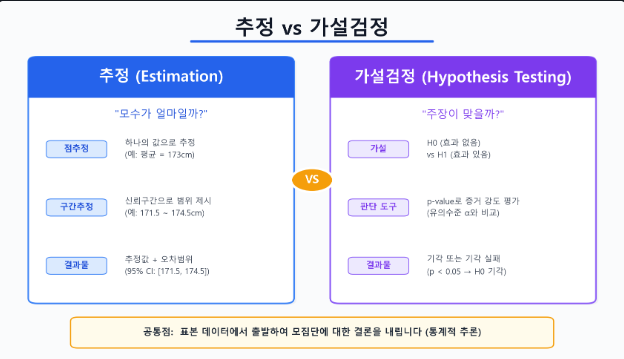

> **핵심**: 추정은 "모수가 얼마인지 범위를 좁히는 것", 가설검정은 "주장에 대해 증거를 평가하는 것"

### 2. 주요 용어 정리

| 용어 | 영어 | 정의 | 예시 |
|------|------|------|------|
| 모수 | Parameter | 모집단의 특성값 — 고정된 값이지만 알 수 없음 | 전국 성인 평균 키 μ = 170cm |
| 모분포 | Population Distribution | 모집단 데이터가 따르는 확률분포 | 성인 키 ~ 정규분포 N(170, 6²) |
| 표본 | Sample | 모집단에서 뽑은 데이터 여러 개의 묶음 | 무작위로 뽑은 100명의 키 데이터 |
| 통계량 | Statistic | 표본에서 계산한 값 — 표본마다 달라짐 | 100명의 평균 x̄ = 171.3cm |
| 추정량 | Estimator | 모수를 추정하는 데 사용하는 공식 | $\bar{X} = \frac{1}{n}\sum X_i$ |
| 추정값 | Estimate | 추정량에 실제 데이터를 넣어 얻은 구체적인 값 | x̄ = 171.3cm |
| 표본분포 | Sampling Distribution | 통계량(예: 표본평균)이 따르는 확률분포 | 100명씩 반복 추출한 평균들의 분포 |
| 표준오차 | Standard Error (SE) | 통계량의 표준편차 — 추정의 정밀도를 나타냄 | SE = 6/√100 = 0.6cm |
| 신뢰구간 | Confidence Interval (CI) | 모수가 포함될 것으로 기대하는 구간 | 95% CI: [170.1, 172.5]cm |
| 귀무가설 | Null Hypothesis (H₀) | "차이가 없다 / 효과가 없다"는 기본 주장 — 기각 대상입니다 | H₀: μ = 170 (평균 키는 170cm과 다르지 않다) |
| 대립가설 | Alternative Hyp. (H₁) | "차이가 있다 / 효과가 있다"는 연구자의 주장 — 입증 대상입니다 | H₁: μ ≠ 170 (평균 키는 170cm과 다르다) |
| p-value | p-value | 귀무가설이 맞다면 이런 결과가 우연히 나올 확률 | p = 0.03 → 유의 수준(α) 보다 작으므로 H₀ 기각 |
| 유의수준 | Significance Level (α) | 판단 기준선 — p-value가 이보다 작으면 H₀를 기각합니다 | α = 0.05 (5%) |

In [1]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import platform

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 전역 시드 설정 (재현성을 위해)
np.random.seed(42)

print("=" * 60)
print("라이브러리 로드 완료!")
print("한글 폰트 설정 완료!")
print("=" * 60)

라이브러리 로드 완료!
한글 폰트 설정 완료!


---

## Part 2: 표본분포와 중심극한정리

### 1. 모집단과 표본

| 구분       | 모집단 (Population)           | 표본 (Sample)                     |
|------------|-------------------------------|-----------------------------------|
| **정의**   | 관심 대상 전체                | 모집단에서 뽑은 일부              |
| **크기**   | N (매우 크거나 무한)          | n (유한, 보통 수십~수천)          |
| **값**     | 모수(μ, σ) — 고정, 알 수 없음 | 통계량(x̄, s) — 표본마다 달라짐   |
| **예시**   | 전국 성인 남성의 키 전체      | 100명을 무작위로 뽑아 측정한 키   |

> 왜 표본을 사용하나요? 모집단 전체를 조사하는 것(전수조사)은 비용과 시간이 많이 듭니다. 그래서 일부(표본)만 뽑아서 전체(모집단)를 추론합니다. 이것이 통계적 추론(Statistical Inference)의 핵심입니다.

### 2. 표본분포 (Sampling Distribution)

**표본분포**: 같은 크기의 표본을 반복적으로 추출할 때, 통계량(예: 표본평균)이 이루는 분포

#### 핵심 개념

1. 모집단에서 크기 n인 표본을 뽑습니다
2. 관심 있는 통계량(평균, 비율, 분산 등)을 계산합니다
3. 이것을 무한히 반복하면 → 통계량들의 분포 = **표본분포**

> 예) 표본**평균**의 분포, 표본**비율**의 분포 등이 모두 표본분포입니다.

#### 대표 예시: 표본평균의 표본분포

| 성질             | 수식                                  | 의미                                          |
|------------------|---------------------------------------|-----------------------------------------------|
| **기대값**       | $E[\bar{X}] = \mu$                   | 표본평균의 평균은 모평균과 같다 (불편성)      |
| **분산**         | $Var(\bar{X}) = \frac{\sigma^2}{n}$  | n이 커질수록 분산 감소 → 더 정밀한 추정       |
| **표준오차(SE)** | $SE = \frac{\sigma}{\sqrt{n}}$       | 표본평균들의 표준편차 (추정의 정밀도)           |

> 여기서 **n**은 하나의 표본에 포함된 데이터 개수(표본크기)입니다. 예) 100명을 뽑았으면 n = 100 \
> **n이 커지면?** 표본평균들의 분산이 줄어들어 모평균 근처에 더 촘촘히 모입니다. 즉, **표본이 클수록 추정이 정밀해집니다.**

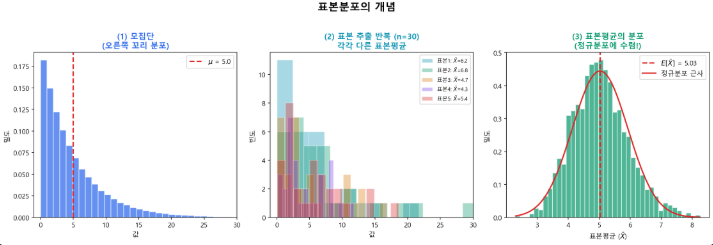

In [2]:

print("\n[실습] 표본분포 체험")
print("목적 1. 불편성 검증: 표본평균들의 평균 ≈ 모평균 → 표본평균이 모평균을 잘 추정한다")
print("목적 2. SE 공식 검증: 이론적 SE(σ/√n) ≈ 실제 SE → 공식이 실제로 맞다")
print("=" * 50)

# 모집단 생성 (지수분포: 오른쪽 꼬리가 긴 비대칭 분포)
np.random.seed(42)
population = np.random.exponential(scale=5, size=100000)
pop_mean = np.mean(population)
pop_std = np.std(population)

print(f"모집단 크기: {len(population):,}")
print(f"모평균 (μ): {pop_mean:.2f}")
print(f"모표준편차 (σ): {pop_std:.2f}")

# 다양한 표본크기로 표본평균의 분포 확인
print("\n[표본크기별 표본평균의 분포]")
print("-" * 50)

for n in [5, 30, 100]:
    # TODO: n개의 표본 추출하여 표본 평균을 구하는 것을 1000번 반복 (np.random.choice)
    # np.random.choice(population, size=n) : 모집단에서 n개만큼 추출
    # np.mean(np.random.choice(population, size=n)) : 모집단에서 n개만큼 추출해서 평균을 냄
    #sample_means = [np.mean(np.random.choice(population, size=n)) for _ in range(1000)] # 위 과정을 1000번 반복해서 표본평균의 개수 1000개 생성
    ## 다른방법
    sample_means = []
    for _ in range(1000):
        sample_means.append(np.mean(np.random.choice(population, size=n)))
        
    # TODO: 이론적 표준오차 (pop_std / np.sqrt(n))
    se_theory = pop_std / np.sqrt(n) # 공식

    # TODO: 실제 표준오차 (np.std(sample_means))
    se_actual = np.std(sample_means)

    se_theory_viz = se_theory if se_theory is not None else 0
    se_actual_viz = se_actual if se_actual is not None else 0
    mean_viz = np.mean(sample_means) if sample_means is not None else 0

    print(f"\nn = {n:>3d}")
    print(f"  표본평균들의 평균: {mean_viz:.2f} (모평균: {pop_mean:.2f})")
    print(f"  이론적 SE = σ/√n = {pop_std:.2f}/√{n} = {se_theory_viz:.3f}")
    print(f"  실제 SE (시뮬레이션):           {se_actual_viz:.3f}")


[실습] 표본분포 체험
목적 1. 불편성 검증: 표본평균들의 평균 ≈ 모평균 → 표본평균이 모평균을 잘 추정한다
목적 2. SE 공식 검증: 이론적 SE(σ/√n) ≈ 실제 SE → 공식이 실제로 맞다
모집단 크기: 100,000
모평균 (μ): 4.98
모표준편차 (σ): 4.96

[표본크기별 표본평균의 분포]
--------------------------------------------------

n =   5
  표본평균들의 평균: 5.01 (모평균: 4.98)
  이론적 SE = σ/√n = 4.96/√5 = 2.220
  실제 SE (시뮬레이션):           2.158

n =  30
  표본평균들의 평균: 5.06 (모평균: 4.98)
  이론적 SE = σ/√n = 4.96/√30 = 0.906
  실제 SE (시뮬레이션):           0.893

n = 100
  표본평균들의 평균: 5.01 (모평균: 4.98)
  이론적 SE = σ/√n = 4.96/√100 = 0.496
  실제 SE (시뮬레이션):           0.486


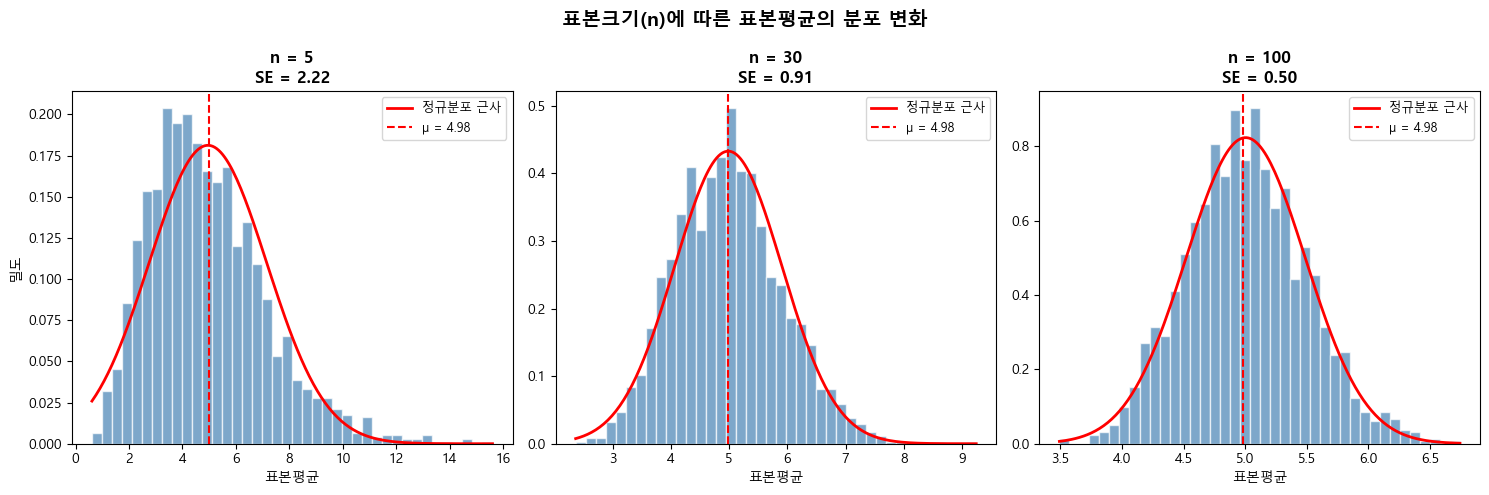

In [3]:
# 시각화: 표본크기별 표본평균의 분포 (CLT 검증)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('표본크기(n)에 따른 표본평균의 분포 변화', fontsize=14, fontweight='bold')

np.random.seed(42)
for i, n in enumerate([5, 30, 100]):
    sample_means = [np.mean(np.random.choice(population, size=n)) for _ in range(2000)]

    axes[i].hist(sample_means, bins=40, density=True, color='steelblue',
                 alpha=0.7, edgecolor='white')

    x = np.linspace(min(sample_means), max(sample_means), 200)
    axes[i].plot(x, stats.norm.pdf(x, np.mean(sample_means), np.std(sample_means)),
                 'r-', linewidth=2, label='정규분포 근사')

    axes[i].axvline(pop_mean, color='red', linestyle='--', linewidth=1.5,
                    label=f'μ = {pop_mean:.2f}')
    axes[i].set_title(f'n = {n}\nSE = {pop_std/np.sqrt(n):.2f}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('표본평균')
    axes[i].legend(fontsize=9)
    if i == 0:
        axes[i].set_ylabel('밀도')
plt.tight_layout()
plt.show()

### 3. 중심극한정리 (Central Limit Theorem, CLT)

통계학에서 가장 중요한 정리 중 하나

> **모집단이 어떤 분포든 상관없이**, 표본크기 n이 충분히 크면 (보통 n ≥ 30),
> 표본평균 $\bar{X}$의 분포는 **정규분포**에 가까워집니다.

$\bar{X} \sim N\left(\mu, \frac{\sigma^2}{n}\right) \quad \text{(n이 충분히 클 때)}$

#### CLT가 중요한 이유

| 이유                       | 설명                                                         |
|----------------------------|--------------------------------------------------------------|
| **분포 가정 불필요**       | 모집단이 정규분포가 아니어도 표본평균은 정규분포에 수렴       |
| **추론의 기초**            | 신뢰구간, 가설검정 모두 표본평균의 정규성(표본평균이 정규분포를 따르는 성질)에 기반             |
| **실용적 기준: n ≥ 30**   | 대부분의 모집단에서 n ≥ 30이면 정규 근사가 충분히 좋다      |

> **주의**: 모집단이 극단적으로 비대칭이거나 이상치가 많으면 n ≥ 30으로도 부족할 수 있습니다.

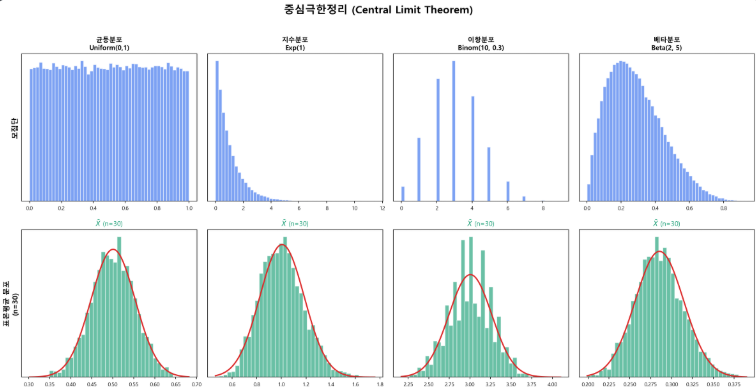

### 4. CLT에 대한 흔한 오해

| 오해 | 진실 |
|------|------|
| "개별 데이터가 정규분포를 따른다" | 개별 데이터는 그대로입니다. **평균의 분포**만 정규분포가 됩니다 |
| "많이 반복하면 정규분포가 된다" | **표본 크기(n)** 가 클수록 정규분포에 가까워집니다. 반복 횟수는 분포 모양과 무관합니다 |
| "모든 통계량이 정규분포를 따른다" | **평균(또는 합계)** 에만 적용됩니다. 중앙값, 최댓값 등은 해당되지 않습니다 |
| "n ≥ 30이면 무조건 충분하다" | 30은 경험적 기준일 뿐입니다. 모집단의 원래 분포에 따라 다릅니다 |

#### 오해 사례 구체적으로 보기

**오해 1: "개별 데이터가 정규분포를 따른다"**

> 주사위를 아무리 많이 던져도 1\~6이 균등하게 나옴.
> 하지만 30개씩 **평균**을 내면 그 평균들이 종 모양을 그림

**오해 2: "반복 횟수가 중요하다"**

```
10명 평균 × 10,000번 = 여전히 덜 정규분포적
100명 평균 × 100번  = 이미 정규분포에 가까움
```
> 중요한 것은 **표본 크기 n**이지, 반복 횟수가 아닙니다

**오해 3: "n ≥ 30이면 항상 충분하다"에 대해**

- **대칭 분포**: 20\~30개도 괜찮음

- **심하게 치우친 분포**(예: 소득): 100개 이상 필요할 수 있습니다

- **이산분포**(예: 0 또는 1): 비율에 따라 수백 개 필요합니다

> 결론: 30은 "대부분의 경우 안전한 기준"이지 절대적 규칙이 아닙니다

### 5. 표본오차 vs 표준오차 — 비슷해 보이지만 다른 개념

| 구분 | 표본오차 (Sampling Error) | 표준오차 (Standard Error, SE) |
|------|--------------------------|-------------------------------|
| **정의** | 특정 표본의 통계량과 모수 간의 **실제 차이** | 표본 통계량(주로 표본평균)들의 **표준편차** |
| **예시** | 모평균 μ=170, 표본평균 x̄=171.3 → 오차 = 1.3 | 100명씩 반복 추출한 표본평균들의 표준편차 = 0.6 |
| **값** | 표본마다 다름 | 표본 크기가 같으면 고정 |
| **계산** | 모수를 알아야 계산 가능 (현실적으로 불가) | 표본만으로 추정 가능: $SE = s / \sqrt{n}$ |
| **활용** | 실제 통계에서 거의 활용 안 됨 | 신뢰구간, 가설검정 등에 핵심적 활용 |

#### 표준오차의 의미를 직관적으로 이해하기

```plain
모집단 → 표본1(n=100) → 평균1
        → 표본2(n=100) → 평균2
        → 표본3(n=100) → 평균3
        → ... 무한반복 ...
이 평균들(평균1, 평균2, ...)의 표준편차 = 표준오차
```

하지만 실제로는 표본을 한 번만 뽑으므로, 분산의 성질에서 유도된 공식 SE = σ / √n 을 사용합니다.
(σ를 모르면 s로 대체: SE = s / √n)

#### 표준오차 활용 예시

1,000명 학생 중 100명 표본 조사:
- 표본 평균: 73점, 표본 표준편차: 10점
- 표준오차 = 10 / √100 = **1점**

해석:
- 100명씩 여러 번 뽑는다면, 그 평균들의 표준편차가 약 1점
- 95% 신뢰구간: 73 ± 2 (약 71\~75점)

> **요약**: 표본오차는 "이번에 뽑은 표본이 실제로 얼마나 빗나갔나" (알 수 없음),
> 표준오차는 "평균적으로 얼마나 빗나갈 것으로 예상되는가" (계산 가능)

---

## Part 3: 통계적 추정

### 1. 점추정 (Point Estimation)

**점추정**: 모수를 하나의 값으로 추정

| 모수             | 점추정량                      | 성질               |
|------------------|-------------------------------|--------------------|
| 모평균 μ         | 표본평균 $\bar{X}$           | 불편, 일치, 효율적 |
| 모분산 σ²        | 표본분산 $s^2$               | 불편, 일치         |
| 모비율 p         | 표본비율 $\hat{p}$           | 불편, 일치         |

#### 좋은 추정량의 조건

| 조건                | 의미                                                    |
|---------------------|---------------------------------------------------------|
| **불편성 (Unbiased)** | 추정량의 기대값이 모수와 같다: $E[\hat{\theta}] = \theta$ |
| **효율성 (Efficient)** | 같은 조건에서 분산이 가장 작다                           |
| **일치성 (Consistent)** | n이 커지면 추정량이 모수에 수렴합니다                   |

In [10]:
# 점추정 실습
print("\n[실습] 점추정 체험")
print("=" * 50)

# 모집단: 평균 170, 표준편차 8인 정규분포 (예: 키)
np.random.seed(42)
true_mu = 170
true_sigma = 8

# 표본 추출
sample = np.random.normal(true_mu, true_sigma, size=50)

print(f"모집단: μ = {true_mu}, σ = {true_sigma}")
print(f"표본 크기: n = {len(sample)}")

# TODO: 점추정 결과 출력 (표본평균, 표본분산, 표본표준편차)
print(f'모평균의 추정: {np.mean(sample):.2f}')
print(f'모분산의 추정: {np.var(sample, ddof=1):.2f}') #numpy의 경우 ddof = 0이 default, pandas의 ddof의 default 값은 1
print(f'모표준편차의 추정: {np.std(sample, ddof=1):.2f}')


[실습] 점추정 체험
모집단: μ = 170, σ = 8
표본 크기: n = 50
모평균의 추정: 168.20
모분산의 추정: 55.79
모표준편차의 추정: 7.47


### 2. 구간추정과 신뢰구간 (Confidence Interval)

**구간추정**: 모수가 포함될 것으로 기대하는 **범위**를 제시

$\text{신뢰구간} = \text{점추정값} \pm \text{오차한계(Margin of Error)}$

#### 모평균의 신뢰구간

| 조건                 | 공식                                                            | 사용 상황                |
|----------------------|-----------------------------------------------------------------|--------------------------|
| **σ를 아는 경우**    | $\bar{X} \pm z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}$      | 거의 없음 (이론적)       |
| **σ를 모르는 경우**  | $\bar{X} \pm t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}}$     | 실무에서 대부분 이 경우  |

> **오차한계 = (임계값) × (표준오차)** 라는 구조를 기억하세요!

#### 신뢰구간 공식은 어떻게 나왔을까?

**1단계**: CLT에 의해 표본평균은 정규분포를 따릅니다

$\bar{X} \sim N\left(\mu,\ \frac{\sigma^2}{n}\right)$

**2단계**: 표준화하면

$Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \sim N(0,\ 1)$

**3단계**: 95% 확률로 Z가 -1.96 ~ 1.96 사이에 있으므로
$P\left(-1.96 < \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} < 1.96\right) = 0.95$

**4단계**: μ에 대해 부등식을 정리하면

$P\left(\bar{X} - 1.96 \cdot \frac{\sigma}{\sqrt{n}} < \mu < \bar{X} + 1.96 \cdot \frac{\sigma}{\sqrt{n}}\right) = 0.95$

이것이 곧 $\bar{X} \pm z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}$ 입니다.

> σ를 모르면 s로 대체하는데, 이때 불확실성이 커지므로 z 대신 꼬리가 더 두꺼운 **t분포**를 사용합니다.

### 3. 신뢰구간의 올바른 해석

#### 95% 신뢰구간의 의미

| 해석         | 설명                                                                    |
|--------------|-------------------------------------------------------------------------|
| **올바른 해석** | "이 방법으로 구간을 100번 만들면, **약 95번은 진짜 μ를 포함**한다"       |
| **틀린 해석**   | "μ가 이 구간에 있을 확률이 95%다" (μ는 고정값이므로 확률 개념 적용 불가) |

> **비유**: 화살을 100번 쏘면 95발은 과녁에 맞는다는 뜻이지, "이 한 발이 과녁에 있을 확률이 95%"는 아닙니다. \
> 한 번 구한 특정 신뢰구간에서 모평균은 이미 **"있거나 없거나"** 둘 중 하나입니다!

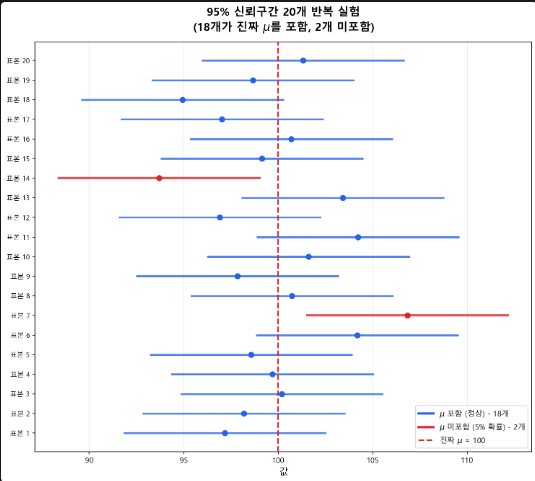

#### 신뢰구간의 세 가지 유형

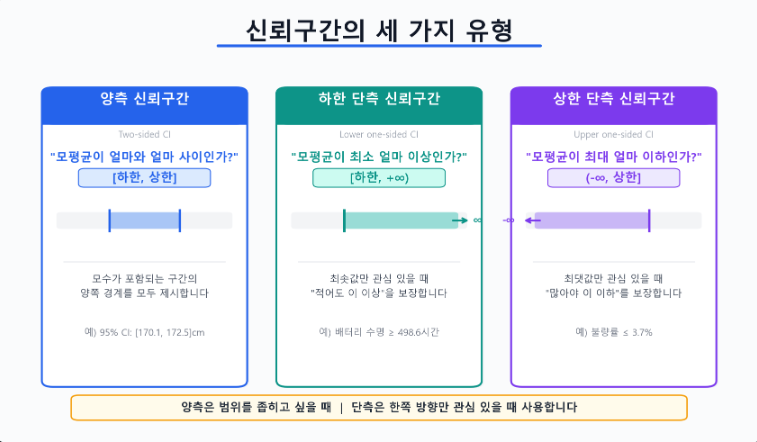

#### 잘못된 해석 vs 올바른 해석 정리

**잘못된 해석 (이렇게 말하면 안 됩니다!)**

- "이 구간이 모평균을 95% 확률로 포함한다"

- "모평균이 이 구간 안에 있을 확률이 95%다"

**올바른 해석**

- **양측**: "이 방법으로 100번 반복하면, 약 95개의 구간이 모평균을 포함"

- **하한 단측**: "이 방법으로 100번 반복하면, 약 95번은 하한값이 모평균보다 작거나 같음"

- **상한 단측**: "이 방법으로 100번 반복하면, 약 95번은 상한값이 모평균보다 크거나 같음"

#### 실무적 해석 (의사결정용)

실무에서는 간결하고 이해하기 쉬운 표현을 사용하되, 통계적 의미를 왜곡하지 않도록 주의:

- **양측**: "95% 신뢰수준으로 실제 평균이 a와 b 사이에 있다고 볼 수 있습니다"

- **하한 단측**: "95% 신뢰수준으로 실제 평균이 a보다 크다고 볼 수 있습니다"

- **상한 단측**: "95% 신뢰수준으로 실제 평균이 b보다 작다고 볼 수 있습니다"

### 4. 신뢰수준과 구간 너비의 관계

| 신뢰수준 | z 임계값 | 구간 너비 | 특징                             |
|----------|----------|-----------|----------------------------------|
| 90%      | 1.645    | 좁음      | 덜 확신하지만 정밀한 추정        |
| 95%      | 1.960    | 보통      | 가장 널리 사용 (기본값)          |
| 99%      | 2.576    | 넓음      | 매우 확신하지만 추정이 넓어짐    |

> **Trade-off** 관계 : \
> 신뢰수준을 높이면 → 구간이 넓어지고 → 정밀도가 떨어집니다. \
> 반대로 신뢰수준을 낮추면 → 구간이 좁아지지만 → 틀릴 가능성이 높아집니다.

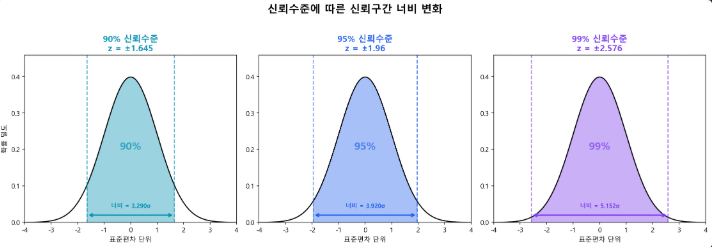

In [ ]:
# 신뢰구간 계산 실습
print("\n[실습] 신뢰구간 계산")
print("=" * 50)

np.random.seed(42)

# 시나리오: 은행창구 대기시간 조사 (50명 표본)
wait_times = np.random.normal(loc=8.5, scale=2.0, size=50) #모집단의 모평균이 8.5분, 표준편차가 2.0분

n = len(wait_times)
xbar = np.mean(wait_times)
s = np.std(wait_times, ddof=1)
se = s / np.sqrt(n)

print(f"은행창구 대기시간 조사 (n = {n})")
print(f"  표본평균 x̄ = {xbar:.2f}분")
print(f"  표본표준편차 s = {s:.2f}분")
print(f"  표준오차 SE = s/√n = {se:.3f}분")

# ─────────────────────────────────────────────
# 방법 1: 수동 계산 (t 분포 사용)
# ─────────────────────────────────────────────
print("\n[방법 1] 수동 계산 (t 분포)")
print("-" * 50)

for confidence in [0.90, 0.95, 0.99]:
    alpha = 1 - confidence
    # TODO: t 임계값 계산 (stats.t.ppf(1 - alpha/2, df=n-1))
    t_crit = stats.t.ppf(1-alpha/2, df=n-1)
    # TODO: 오차한계 계산 (t_crit * se)
    margin = t_crit * se
    # TODO: 신뢰구간 하한, 상한 계산
    ci_low = xbar - margin
    ci_high = xbar + margin
    # TODO: 결과 출력
    print(f'신뢰수준 {confidence*100:.0f} CI: [{ci_low:.2f}, {ci_high:.2f}]')
    #신뢰수준 90 CI: [7.61, 8.49]
    # 신뢰수준 95 CI: [7.52, 8.58]
    # 신뢰수준 99 CI: [7.34, 8.76]

# ─────────────────────────────────────────────
# 방법 2: scipy.stats 활용
# ─────────────────────────────────────────────
print("\n[방법 2] scipy.stats 활용")
print("-" * 50)

# TODO: stats.t.interval(신뢰수준, df, loc, scale)로 90%, 95%, 99% CI 계산
ci_90 = stats.t.interval(0.9, df=n-1, loc=xbar, scale=se)
ci_95 = stats.t.interval(0.95, df=n-1, loc=xbar, scale=se)
ci_99 = stats.t.interval(0.99, df=n-1, loc=xbar, scale=se)

print(f'신뢰수준 {0.90} CI: [{ci_90[0]:.2f}, {ci_90[1]:.2f}]')
print(f'신뢰수준 {0.95} CI: [{ci_95[0]:.2f}, {ci_95[1]:.2f}]')
print(f'신뢰수준 {0.99} CI: [{ci_99[0]:.2f}, {ci_99[1]:.2f}]')
print(ci_90) #튜플 형태로 저장됨 (np.float64(7.606306264452769), np.float64(8.49179811452267))



[실습] 신뢰구간 계산
은행창구 대기시간 조사 (n = 50)
  표본평균 x̄ = 8.05분
  표본표준편차 s = 1.87분
  표준오차 SE = s/√n = 0.264분

[방법 1] 수동 계산 (t 분포)
--------------------------------------------------
신뢰수준 90 CI: [7.61, 8.49]
신뢰수준 95 CI: [7.52, 8.58]
신뢰수준 99 CI: [7.34, 8.76]

[방법 2] scipy.stats 활용
--------------------------------------------------
신뢰수준 0.9 CI: [7.61, 8.49]
신뢰수준 0.95 CI: [7.52, 8.58]
신뢰수준 0.99 CI: [7.34, 8.76]
(np.float64(7.606306264452769), np.float64(8.49179811452267))


### 5. 단측 신뢰구간 (One-sided CI)

| 유형 | 공식 | 관심사 |
|------|------|--------|
| **양측** | $\bar{X} \pm t_{\alpha/2} \cdot SE$ | "얼마와 얼마 사이인가?" |
| **상한 단측** | $(-\infty, \; \bar{X} + t_{\alpha} \cdot SE]$ | "최대 얼마 이하인가?" |
| **하한 단측** | $[\bar{X} - t_{\alpha} \cdot SE, \; +\infty)$ | "최소 얼마 이상인가?" |

> **주의**: 양측은 $t_{\alpha/2}$, 단측은 $t_{\alpha}$를 사용합니다!

#### 단측 신뢰구간 활용 예시

**예시 1: 배터리 수명 (하한 단측)**

- 상황: 배터리 제조사가 "최소 500시간 이상 작동"을 보장하려 함

- 10개 테스트 결과: 평균 502.9시간, 표준편차 5.8시간

- 95% 하한 CI: \[498.6시간, +∞)

- 결론: 95% 신뢰수준으로 평균 수명이 최소 498.6시간 이상 → 500시간 보장은 어려움

**예시 2: 불량률 상한 (상한 단측)**

- 상황: 품질관리팀이 "불량률이 최대 5% 이하"임을 확인

- 검사 결과: 평균 불량률 3.1%, 표준편차 0.99%

- 95% 상한 CI: (−∞, 3.7%\]

- 결론: 95% 신뢰수준으로 평균 불량률이 최대 3.7% 이하 → 5% 기준 충족

In [17]:
# 단측 신뢰구간 실습
print("\n[실습] 양측 vs 단측 신뢰구간 비교")
print("=" * 50)

np.random.seed(99)

# 시나리오 1: 양측 CI
# 신제품 배터리의 평균 수명이 대략 어느 범위인지 파악하고 싶습니다
battery_hours = np.random.normal(loc=503, scale=6, size=10) #모집단 배터리 평균 수명 503시간, 표준편차 6시간, 샘플 10개 추출
n_bat = len(battery_hours) #샘플 개수
mean_bat = np.mean(battery_hours) # 표본 평균
se_bat = stats.sem(battery_hours) # 표준 오차

print(f"[시나리오] 신제품 배터리 수명 테스트 (n = {n_bat})")
print(f"  표본평균: {mean_bat:.1f}시간, 표준오차: {se_bat:.2f}시간")

# TODO: 양측 95% CI 계산 
ci_low, ci_high = stats.t.interval(0.95, df=n_bat-1, loc=mean_bat, scale=se_bat)
# TODO: 결과 출력
print(f"신뢰수준 {0.95} CI: [{ci_low:.2f}, {ci_high:.2f}]")


[실습] 양측 vs 단측 신뢰구간 비교
[시나리오] 신제품 배터리 수명 테스트 (n = 10)
  표본평균: 504.4시간, 표준오차: 2.23시간
신뢰수준 0.95 CI: [499.40, 509.49]


In [ ]:

# 시나리오 2: 하한 단측 CI
# 광고에 "최소 OO시간 이상"이라고 쓰려면 하한값이 필요합니다 (품질 보증)
# TODO: t 임계값 계산 
t_one = stats.t.ppf(0.95, df=n_bat-1)

# TODO: 하한 경계값 계산 
lower_bound = mean_bat - t_one * se_bat

# TODO: 결과 출력
print(lower_bound) # 95% 신뢰수준으로 최소 500.35시간 이상을 보장한다.

500.3561776216407


In [24]:

# 시나리오 3: 상한 단측 CI
# 커피숍 평균 대기시간이 최대 얼마 이하인지 확인하고 싶습니다 (서비스 기준)
np.random.seed(77)
wait_times = np.random.normal(loc=4.2, scale=1.0, size=15) #모집단 4.2분 평균 대기시간, 표준편차 1분, 15개의 샘플
n_wait = len(wait_times)
mean_wait = np.mean(wait_times)
se_wait = stats.sem(wait_times)

# TODO: t 임계값, 상한 경계값 계산
t_one1 = stats.t.ppf(0.95, df=n_wait-1)
t_one2 = stats.t.ppf(0.05, df=n_wait-1)
print(t_one1, t_one2)

# 상한 경계선
upper_bound = mean_wait + t_one1 * se_wait

# TODO: 결과 출력
print(upper_bound) #95% 신뢰수준으로 최대 4.49분 이하 대기한다.


1.761310135774891 -1.7613101357748917
4.494374963292189


### 6. 추정이 목적일 때 표본크기 결정

"오차한계를 특정 값 이하로 하려면 표본이 얼마나 필요한가?"

$n = \left(\frac{z_{\alpha/2} \cdot \sigma}{E}\right)^2$

| 변수 | 의미                     | 예시                          |
|------|--------------------------|-------------------------------|
| n    | 필요한 표본크기          | 구하려는 값                   |
| z    | 신뢰수준에 해당하는 z값  | 95% → 1.96, 99% → 2.576      |
| σ    | 모표준편차 (사전 추정치) | 예비조사 또는 선행연구에서 추정 |
| E    | 원하는 오차한계          | 예) ±3%p, ±0.5cm             |

> **실무 활용 흐름**
> 1. σ를 모르므로 예비조사(pilot study)나 선행연구로 먼저 추정합니다
> 2. 원하는 오차한계(E)와 신뢰수준을 정합니다
> 3. 공식에 넣어 필요한 n을 계산합니다
> 4. 계산된 n만큼 본조사를 실시합니다
>
> 여론조사에서 "95% 신뢰수준, 오차범위 ±3.1%p"라고 표기하는 것이 이 공식의 결과입니다

In [28]:
# 표본크기 결정 실습
print("\n[실습] 표본크기 결정")
print("=" * 50)
print("시나리오: 커피숍 평균 대기시간을 조사하려고 합니다.")
print("사전 조사에서 표준편차 약 2분으로 추정되었습니다.")
print("95% 신뢰수준에서 오차한계를 0.5분 이내로 하고 싶다면 표본의 크기를 얼마로 해야할까")

sigma_est = 2.0    # 추정 표준편차
z_95 = 1.96        # 95% 신뢰수준 z값
E = 0.5            # 원하는 오차한계

# TODO: 필요 표본크기 계산
n_required = (z_95 * sigma_est / E) ** 2

# TODO: 결과 출력
print(np.ceil(n_required))

# 오차한계별 필요 표본크기 비교
print("\n[오차한계별 필요 표본크기]")
print("-" * 40)
for E in [1.0, 0.5, 0.3, 0.1]:
    # TODO: 각 오차한계에 대한 필요 표본크기 계산 및 출력
    n_required = (z_95 * sigma_est / E) ** 2
    print (f' 오차한계 +-{E}분 = {int(np.ceil(n_required))}명') #올림으로 최대 표본개수를 구한다



[실습] 표본크기 결정
시나리오: 커피숍 평균 대기시간을 조사하려고 합니다.
사전 조사에서 표준편차 약 2분으로 추정되었습니다.
95% 신뢰수준에서 오차한계를 0.5분 이내로 하고 싶다면 표본의 크기를 얼마로 해야할까
62.0

[오차한계별 필요 표본크기]
----------------------------------------
 오차한계 +-1.0분 = 16명
 오차한계 +-0.5분 = 62명
 오차한계 +-0.3분 = 171명
 오차한계 +-0.1분 = 1537명


---

## Part 4: 가설검정 기초

### 1. 가설검정이란?

**가설검정**: 모집단에 대한 주장(가설)을 표본 데이터를 이용해 검증하는 통계적 절차

#### 핵심 아이디어

> "효과가 없다"고 가정하고 → 데이터를 확인하고 → "이런 결과가 우연히 나올 수 있을까?" 판단합니다.

만약 우연히 나오기 어려운 결과라면 → "효과가 없다"는 가정을 버립니다 (기각).

#### 간접 증명 방식 (반증의 논리)

대립가설을 **직접** 증명하는 것은 불가능합니다 (표본 기반 추론의 한계).

따라서 **반증의 논리**를 사용합니다:

```
"귀무가설이 참이라면 이런 극단적 결과가 나올 확률이 매우 낮다
→ 귀무가설 기각 → 대립가설 지지"
```

> **한계**: 귀무가설 기각 → 대립가설을 "지지"할 뿐, "확실한 증명"이 아닙니다.
> 5% 유의수준 = 20번 중 1번은 틀릴 가능성이 있습니다

### 2. 귀무가설과 대립가설

| 구분             | 귀무가설 (H₀, Null)                    | 대립가설 (H₁, Alternative)            |
|------------------|----------------------------------------|----------------------------------------|
| **역할**         | "변화 없음", "효과 없음" (현상 유지)   | "변화 있음", "효과 있음" (증명하고 싶은 것) |
| **입증 책임**    | 기본적으로 참이라고 가정               | 증거로 입증해야 함                     |
| **예시**         | "신약은 기존 약과 효과가 같다"         | "신약이 기존 약보다 효과가 있다"       |
| **수식 예시**    | H₀: μ = 170                           | H₁: μ ≠ 170 (또는 > 170, < 170)      |
> **비유 — 법정 재판**: H₀ = "무죄 추정" / H₁ = "유죄". 검사(데이터)가 충분한 증거를 제시해야 유죄(기각) 판결을 내릴 수 있습니다.

#### 가설 설정의 원칙: 상호배타적 + 전체포함

- **상호배타적**: H₀와 H₁이 정반대 (동시에 참일 수 없음)

- **전체포함**: 모든 가능한 경우를 빠짐없이 포함

**올바른 예시:**

| 검정 유형 | H₀ | H₁ |
|-----------|-----|-----|
| 양측검정 | μ = 100 | μ ≠ 100 |
| 상한 단측 | μ ≤ 100 | μ > 100 ("기준값보다 큰지") |
| 하한 단측 | μ ≥ 100 | μ < 100 ("기준값보다 작은지") |

**잘못된 예시:** H₀: μ = 100 vs H₁: μ = 110 → 중간값 누락!

#### 귀무/대립가설을 반대로 설정할 수 있을까?

일반 검정은 **"있음"을 증명**하는 구조이므로, 반대로 증명할 수 없습니다.

```
✅ 올바른 설정:

H₀: 신약 효과 = 0 (효과 없음)
H₁: 신약 효과 ≠ 0 (효과 있음)

❌ 잘못된 설정:

H₀: 신약 효과 있음
H₁: 신약 효과 없음
```

> **"효과 없음"을 증명하고 싶다면?** → **동등성 검정**(Equivalence Test)이라는 특수 검정을 사용해야 합니다. \
> (예: 제네릭 의약품이 오리지널과 동등함을 증명할 때)

### 3. p-value와 유의수준

#### p-value란?

> **p-value** = 귀무가설이 참이라고 가정했을 때, 현재 관찰한 결과보다 **같거나 더 극단적인** 결과가 나올 확률

쉽게 말하면: "H₀가 맞다면, 이런 결과가 나올 확률이 얼마나 되나?"

#### p-value 계산 과정

1. H₀ 하에서 검정통계량의 분포를 정합니다
2. 표본 데이터로 검정통계량을 계산합니다 (예: z = (x̄ - μ₀) / (σ/√n))
3. 검정 방향에 따라 꼬리 확률을 구합니다

| 검정 방향 | 대립가설 | p-value 계산 | scipy 코드 |
|-----------|---------|-------------|-----------|
| 양측검정 | H₁: μ ≠ μ₀ | 양쪽 꼬리 합 | `2 * stats.norm.sf(abs(z))` |
| 우측검정 | H₁: μ > μ₀ | 오른쪽 꼬리 | `stats.norm.sf(z)` |
| 좌측검정 | H₁: μ < μ₀ | 왼쪽 꼬리 | `stats.norm.cdf(z)` |

#### 유의수준 (α)

> **유의수준 α** = "H₀를 잘못 기각할 위험을 이 정도까지 감수하겠다"는 사전 기준

보통 α = 0.05 (5%)를 사용

#### 판정 규칙

| p-value 결과      | 판정             | 해석                                        |
|--------------------|------------------|---------------------------------------------|
| **p ≤ α**          | H₀ **기각**      | "이 결과가 우연이라고 보기 어렵습니다" → 통계적으로 유의 |
| **p > α**          | H₀ **기각 실패** | "이 결과가 우연일 수 있다" → 판단 보류       |
> **"기각 실패" ≠ "H₀가 참"** — 증거가 부족해서 판단을 보류한 것일 뿐, H₀가 맞다고 증명된 것은 아닙니다.

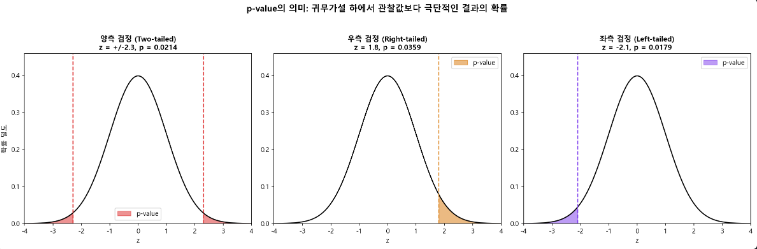

#### 왜 p-value가 유의수준보다 작으면 귀무가설을 기각하나요?

- p-value가 작다 = **귀무가설이 맞다는 가정에서 이런 결과가 나올 가능성이 매우 낮음**

- 예: p-value = 0.01 (1%) → 100번 중 1번만 발생하는 드문 결과 → 귀무가설을 의심해야 함

- 따라서 "이 결과는 우연이 아니다"라고 판단하고 → H₀를 기각합니다

#### "기각 실패"와 "채택"은 다릅니다!

**p ≥ α일 때:**

| 구분 | 표현 |
|------|------|
| **올바른 표현** | "귀무가설 기각 실패", "대립가설 증거 불충분" |
| **잘못된 표현** | "귀무가설 채택", "귀무가설이 참", "대립가설 기각" |

> **비유**: 법정에서 유죄 증거 부족이 그 사람의 **무죄를 증명**하는 것은 아닙니다

**실전 예시:** 신약 실험에서 p = 0.08, α = 0.05

- **잘못된 해석**: "신약은 효과가 없다", "귀무가설을 채택한다"
- **올바른 해석**: "귀무가설을 기각할 충분한 증거가 없다", "더 큰 표본이 필요할 수 있다"

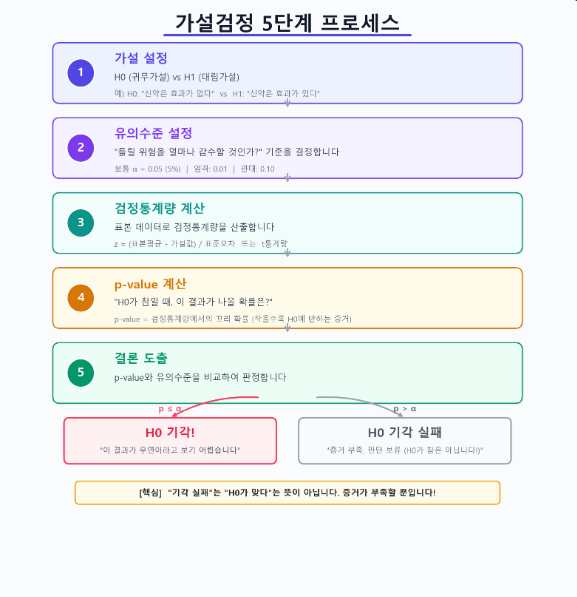

---

## Part 5: 주요 검정 방법

### 검정 방법 선택 가이드

| 조건                      | 검정 방법            | scipy.stats 함수                    |
|---------------------------|----------------------|-------------------------------------|
| 모분산 σ를 아는 경우 (안씀)     | **z-검정**           | `statsmodels.stats.weightstats`     |
| 1개 표본, σ 모름          | **단일표본 t-검정**  | `stats.ttest_1samp(data, mu0)`      |
| 2개 독립 표본, σ 모름     | **독립표본 t-검정**  | `stats.ttest_ind(a, b)`             |
| 2개 짝지은(전후) 표본     | **대응표본 t-검정**  | `stats.ttest_rel(before, after)`    |

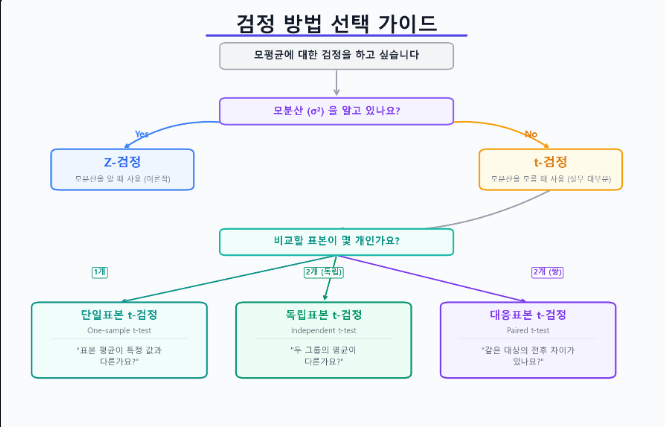

### 5.1 z-검정 (Z-test)

**모분산(σ)을 아는 경우** 모평균을 검정하는 방법 (실무에서는 매우 드묾)

$z = \frac{\bar{X} - \mu_0}{\sigma / \sqrt{n}}$

> **실무에서는 거의 사용하지 않지만**, 가설검정의 원리를 이해하는 데 가장 좋은 출발점입니다.

In [ ]:
# z-검정 실습 (수동 구현)
print("\n" + "=" * 60)
print("Part 5.1: z-검정")
print("=" * 60)

print("\n[시나리오]")
print("전구 수명이 평균 1000시간이라고 알려져 있습니다. (σ = 50시간)")
print("새 공정으로 생산한 전구 36개의 평균 수명이 1015시간이었습니다.")
print("새 공정이 수명이 늘어났나요?")

mu_0 = 1000        # 귀무가설 하의 모평균
sigma = 50          # 알려진 모표준편차
n = 36
xbar = 1015

print(f"\nH0: μ = {mu_0}") #귀무가설: 모집단의 평균이 1000시간이다.(현상유지)
print(f"H1: μ > {mu_0} (우측검정)") #대립가설: 모집단의 평균이 1000시간 이상이다

# TODO: z 검정통계량 계산 (xbar - mu_0) / (sigma / sqrt(n))
z_stats = (xbar - mu_0) / (sigma / np.sqrt(n))

# TODO: p-value 계산 (우측검정: stats.norm.sf(z_stat))
p_value = stats.norm.sf(z_stats)

# TODO: 결과 출력 및 판정 (α = 0.05)
a = 0.05
if p_value < a :
    print(f'{p_value} 귀무가설 기각') # 95% 신뢰수준 - 새로운 공정은 1000시간 이상이다.
else:
    print(f'{p_value} 귀무가설 기각 실패')


Part 5.1: z-검정

[시나리오]
전구 수명이 평균 1000시간이라고 알려져 있습니다. (σ = 50시간)
새 공정으로 생산한 전구 36개의 평균 수명이 1015시간이었습니다.
새 공정이 수명이 늘어났나요?

H0: μ = 1000
H1: μ > 1000 (우측검정)
0.03593031911292581 귀무가설 기각


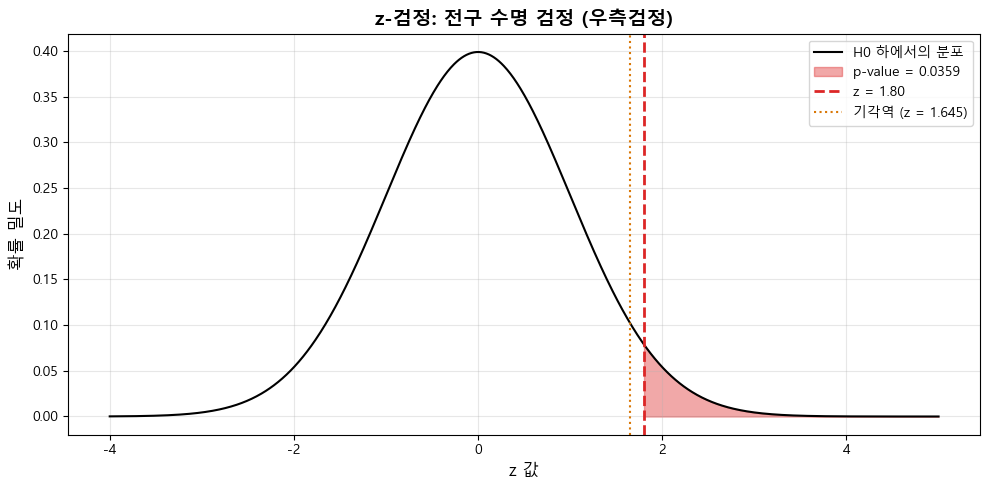

In [31]:
# 시각화: z-검정 결과
z_stat = (xbar - mu_0) / (sigma / np.sqrt(n))
p_value = stats.norm.sf(z_stat)

fig, ax = plt.subplots(figsize=(10, 5))
x = np.linspace(-4, 5, 1000)
y = stats.norm.pdf(x)

ax.plot(x, y, 'k-', linewidth=1.5, label='H0 하에서의 분포')
ax.fill_between(x[x >= z_stat], y[x >= z_stat], alpha=0.4, color='#DC2626',
                label=f'p-value = {p_value:.4f}')
ax.axvline(z_stat, color='#DC2626', linestyle='--', linewidth=2,
           label=f'z = {z_stat:.2f}')
ax.axvline(1.645, color='#D97706', linestyle=':', linewidth=1.5,
           label=f'기각역 (z = 1.645)')

ax.set_title('z-검정: 전구 수명 검정 (우측검정)', fontsize=14, fontweight='bold')
ax.set_xlabel('z 값', fontsize=12)
ax.set_ylabel('확률 밀도', fontsize=12)
ax.legend(fontsize=10)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()



### 5.2 t-검정 (t-test)

**모분산을 모를 때** 사용하는 검정 방법 — 실무에서 가장 많이 사용

#### t분포의 특징

| 특징                     | 설명                                                   |
|--------------------------|--------------------------------------------------------|
| 정규분포와 비슷          | 종 모양, 좌우 대칭                                     |
| 꼬리가 더 두꺼움         | 정규분포보다 극단값이 나올 확률이 높음 → 더 보수적      |
| 자유도(df)에 따라 변화   | df가 커질수록 정규분포에 가까워짐                       |
| df = n - 1 (단일표본)    | 표본크기에서 1을 빼서 자유도 결정                      |

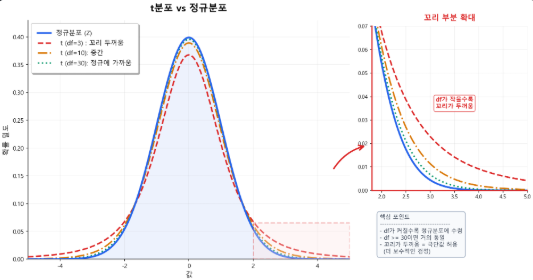

#### 5.2.1 단일표본 t-검정 (One-sample t-test)

**"하나의 표본 평균이 특정 값과 다른가?"**

$t = \frac{\bar{X} - \mu_0}{s / \sqrt{n}}, \quad df = n - 1$

**사용 예시**:

- 제품 중량이 규격(500g)과 다른가?

- 학생 평균 점수가 전국 평균(70점)과 다른가?

In [ ]:
print("\n" + "=" * 60)
print("Part 5.2.1: 단일표본 t-검정")
print("=" * 60)

print("\n[시나리오1] A 지역 성인 혈압 검정")
print("=" * 50)
print("A 지역은 건강 프로그램을 운영 중입니다.")
print("이 지역 성인 20명의 수축기 혈압을 측정하여")
print("전국 평균(130mmHg)보다 낮은지 검정합니다.")

np.random.seed(123)
bp_data = np.random.normal(loc=122, scale=12, size=20)

print(f"\n데이터: {np.round(bp_data, 1)}")
print(f"표본평균: {np.mean(bp_data):.2f} mmHg")
print(f"표준편차: {np.std(bp_data, ddof=1):.2f} mmHg")

print("\n[1단계] 가설 설정")
print("  H0: μ = 130  (전국 평균과 같다)")
print("  H1: μ < 130  (전국 평균보다 낮다) → 좌측검정")

alpha = 0.05
print(f"\n[2단계] 유의수준: α = {alpha}")

# ── 단일표본 t-검정 (one-sample t-test) ──
# 검정통계량: t = (x̄ - μ₀) / (s / √n)

# TODO: 표본크기 n, 귀무가설 모평균 mu_0 설정
n = len(bp_data)
mu_0 = 130
# TODO: 표본평균 x̄, 표본표준편차 s(ddof=1), 표준오차 SE 계산
xbar = np.mean(bp_data)
s = np.std(bp_data, ddof=1)
se = s / np.sqrt(n)

# TODO: 검정통계량 t 계산
t_stat = (xbar - mu_0) / se

# TODO: 자유도 df = n - 1
df = n - 1

# TODO: p-value 계산
p_value = stats.t.cdf(t_stat, df)

# TODO: 결과 출력
print(p_value) #0.032

# TODO: p-value와 α 비교하여 결론 출력
# a = 0.05 인 경우 귀무가설 기각

# ── scipy.stats로 검증 ──
# TODO: stats.ttest_1samp(bp_data, popmean=130) 으로 검증
#   주의: ttest_1samp은 양측 p-value를 반환합니다
#   좌측 변환: p_좌측 = p_양측/2 (t < 0일 때)
# TODO: 수동 계산 결과와 비교 출력
t_stat, p_value = stats.ttest_1samp(bp_data, popmean=130) # 양측 검정 p_value가 나옴
print(t_stat,p_value/2)


Part 5.2.1: 단일표본 t-검정

[시나리오1] A 지역 성인 혈압 검정
A 지역은 건강 프로그램을 운영 중입니다.
이 지역 성인 20명의 수축기 혈압을 측정하여
전국 평균(130mmHg)보다 낮은지 검정합니다.

데이터: [109.  134.  125.4 103.9 115.1 141.8  92.9 116.9 137.2 111.6 113.9 120.9
 139.9 114.3 116.7 116.8 148.5 148.2 134.  126.6]
표본평균: 123.37 mmHg
표준편차: 15.09 mmHg

[1단계] 가설 설정
  H0: μ = 130  (전국 평균과 같다)
  H1: μ < 130  (전국 평균보다 낮다) → 좌측검정

[2단계] 유의수준: α = 0.05
0.03216088466869513
-1.964075748428177 0.03216088466869512


In [37]:
print("\n[시나리오2] 커피 용량 품질 관리")
print("자판기 커피의 목표 용량: 200ml")
print("15잔을 측정했을 때, 규격에 맞는지 검정합니다")

np.random.seed(42)
coffee_ml = np.random.normal(loc=197, scale=5, size=15)

print(f"\n측정값: {np.round(coffee_ml, 1)}")
print(f"표본평균: {np.mean(coffee_ml):.2f}ml")
print(f"표본표준편차: {np.std(coffee_ml, ddof=1):.2f}ml")


[시나리오2] 커피 용량 품질 관리
자판기 커피의 목표 용량: 200ml
15잔을 측정했을 때, 규격에 맞는지 검정합니다

측정값: [199.5 196.3 200.2 204.6 195.8 195.8 204.9 200.8 194.7 199.7 194.7 194.7
 198.2 187.4 188.4]
표본평균: 197.05ml
표본표준편차: 4.97ml


In [ ]:
# 가설
mu_0 = 200
print(f"\nH0: μ = {mu_0}ml (규격에 맞음)")
print(f"H1: μ ≠ {mu_0}ml (규격에 안 맞음) → 양측검정")

# TODO: scipy.stats로 단일표본 t-검정 (stats.ttest_1samp)
t_stat, p_value = stats.ttest_1samp(coffee_ml, popmean=200)

# TODO: 결과 출력 (t-통계량, 자유도, p-value)
# TODO: p-value와 α 비교하여 결론 출력
print(t_stat, p_value) # -2.2971353602418363 0.0375536706473834, 귀무가설을 기각!


# TODO: H0 기각 시 95% 신뢰구간도 계산하여 출력
ci = stats.t.interval(0.95, df=len(coffee_ml)-1, loc=np.mean(coffee_ml), scale=stats.sem(coffee_ml))
print(ci) #(np.float64(194.29901708052174), np.float64(199.80446816281156))


H0: μ = 200ml (규격에 맞음)
H1: μ ≠ 200ml (규격에 안 맞음) → 양측검정
-2.2971353602418363 0.0375536706473834
(np.float64(194.29901708052174), np.float64(199.80446816281156))


#### 5.2.2 독립표본 t-검정 (Independent two-sample t-test)

**"두 독립적인 그룹의 평균이 다른가?"**

$t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}, \quad df \approx \text{Welch 보정}$

**사용 예시**:

- A반과 B반의 시험 점수 차이가 유의한가?

- 남녀의 평균 급여 차이가 있나요?

- 실험군과 대조군의 효과 차이


[시나리오] 두 학습법의 효과 비교
A법(전통 강의)과 B법(플립 러닝)으로 각각 수업 후 시험 점수 비교

A법 (전통 강의): n=25, 평균=70.36, SD=9.57
B법 (플립 러닝): n=30, 평균=75.49, SD=10.79


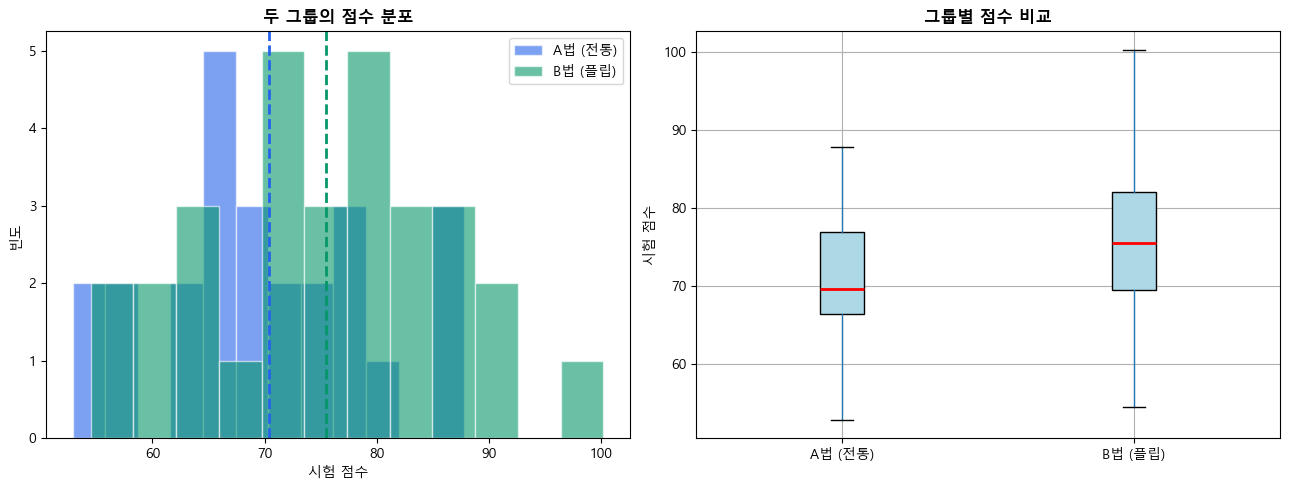

In [41]:
print("\n[시나리오] 두 학습법의 효과 비교")
print("A법(전통 강의)과 B법(플립 러닝)으로 각각 수업 후 시험 점수 비교")

np.random.seed(42)
group_a = np.random.normal(loc=72, scale=10, size=25)   # A법
group_b = np.random.normal(loc=78, scale=12, size=30)   # B법

print(f"\nA법 (전통 강의): n={len(group_a)}, 평균={np.mean(group_a):.2f}, "
      f"SD={np.std(group_a, ddof=1):.2f}")
print(f"B법 (플립 러닝): n={len(group_b)}, 평균={np.mean(group_b):.2f}, "
      f"SD={np.std(group_b, ddof=1):.2f}")

# 시각화: 두 그룹 비교
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# 히스토그램 비교
axes[0].hist(group_a, bins=12, alpha=0.6, color='#2563EB', edgecolor='white', label='A법 (전통)')
axes[0].hist(group_b, bins=12, alpha=0.6, color='#059669', edgecolor='white', label='B법 (플립)')
axes[0].axvline(np.mean(group_a), color='#2563EB', linestyle='--', linewidth=2)
axes[0].axvline(np.mean(group_b), color='#059669', linestyle='--', linewidth=2)
axes[0].set_xlabel('시험 점수')
axes[0].set_ylabel('빈도')
axes[0].set_title('두 그룹의 점수 분포', fontsize=12, fontweight='bold')
axes[0].legend(fontsize=10)

# 박스플롯
data_box = pd.DataFrame({'A법 (전통)': pd.Series(group_a), 'B법 (플립)': pd.Series(group_b)})
data_box.boxplot(ax=axes[1], patch_artist=True,
                 boxprops=dict(facecolor='lightblue'),
                 medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('시험 점수')
axes[1].set_title('그룹별 점수 비교', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# 가설
print(f"\nH0: μA = μB (두 학습법의 효과가 같다)")
print(f"H1: μA ≠ μB (두 학습법의 효과가 다르다)")

# 독립표본 t-검정
# 1) 두 집단의 분산이 동일할 때 :student's t-검정
# 2) 두 집단의 분산이 다를 때: Welch's t-test 검정
# 일반적으로 다르고, 같다 하더라도 Welch's t-test 검정으로 해도 큰 차이가 없음!
# 현대 통계학에서는 무조건 Welch's t-test 검정을 한다!


# TODO: Welch's t-test 수행 
t_test, p_value = stats.ttest_ind(group_a, group_b, equal_var=False) #equal_var : 두그룹의 분산이 같은이 유무

# 유의수준 a =0.05
print(p_value) #0.0677
# --> 결과: 귀무가설 기각 실패
# 현대 통계학에서는 등분산 검정의 과정이 필요가 없어짐.


H0: μA = μB (두 학습법의 효과가 같다)
H1: μA ≠ μB (두 학습법의 효과가 다르다)
0.06772897961019297


In [ ]:
# ── 등분산 검정 ── 
# H0: 두 그룹의 분산이 같다 (등분산)
# H1: 두 그룹의 분산이 다르다 (이분산)
# p-value가 크다 → H0을 기각하지 못한다 → "분산이 같다"를 유지 → 등분산
# - Levene 검정: 정규성 가정이 필요 없음 (더 안전, 일반적으로 권장)
# - Bartlett 검정: 정규성을 가정함 (데이터가 정규분포일 때 더 정확)

lev_stat, lev_p = stats.levene(group_a, group_b)
bar_stat, bar_p = stats.bartlett(group_a, group_b)

print("[등분산 검정]")
print(f"  Levene:   F = {lev_stat:.4f}, p-value = {lev_p:.4f}")
print(f"  Bartlett: χ² = {bar_stat:.4f}, p-value = {bar_p:.4f}")

# H0: 두 그룹의 분산이 같다
# p > 0.05 → 등분산 가정 가능 → equal_var=True (Student's t-test)
# p ≤ 0.05 → 등분산 가정 불가 → equal_var=False (Welch's t-test)

if lev_p > 0.05:
    print("  → 등분산 가정 가능 (Student's t-test)")
else:
    print("  → 등분산 가정 불가 (Welch's t-test 사용)")

#### 5.2.3 대응표본 t-검정 (Paired t-test)

**"같은 대상의 전후 차이가 유의한가?"**

$t = \frac{\bar{d}}{s_d / \sqrt{n}}, \quad \text{여기서 } d_i = X_{after,i} - X_{before,i}$

**사용 예시**:

- 다이어트 전후 체중 변화

- 교육 프로그램 전후 점수 변화

- 약물 복용 전후 혈압 변화

> **독립표본 vs 대응표본**: 같은 사람의 전후 비교 → 대응표본, 서로 다른 사람 비교 → 독립표본

In [3]:
print("\n" + "=" * 60)
print("Part 5.2.3: 대응표본 t-검정")
print("=" * 60)

print("\n[시나리오] 다이어트 프로그램 효과 검증")
print("12명이 8주간 다이어트 프로그램에 참여")
print("프로그램 전후 체중(kg)을 비교")

np.random.seed(42)
n_people = 12
before = np.random.normal(loc=80, scale=8, size=n_people)
weight_loss = np.random.normal(loc=2, scale=3, size=n_people)
after = before - weight_loss

print(f"\n{'대상':>6} {'전(kg)':>10} {'후(kg)':>10} {'차이(kg)':>10}")
print("-" * 40)
for i in range(n_people):
    diff = after[i] - before[i]
    print(f"  {i+1:>3d}   {before[i]:>8.1f}   {after[i]:>8.1f}   {diff:>8.1f}")

differences = after - before
print(f"\n차이(d = 후 - 전)의 평균: {np.mean(differences):.2f} kg")
print(f"차이의 표준편차: {np.std(differences, ddof=1):.2f} kg")


Part 5.2.3: 대응표본 t-검정

[시나리오] 다이어트 프로그램 효과 검증
12명이 8주간 다이어트 프로그램에 참여
프로그램 전후 체중(kg)을 비교

    대상      전(kg)      후(kg)     차이(kg)
----------------------------------------
    1       84.0       81.2       -2.7
    2       78.9       82.6        3.7
    3       85.2       88.4        3.2
    4       92.2       91.9       -0.3
    5       78.1       79.2        1.0
    6       78.1       75.2       -2.9
    7       92.6       93.4        0.7
    8       86.1       88.4        2.2
    9       76.2       69.8       -6.4
   10       84.3       83.0       -1.3
   11       76.3       74.1       -2.2
   12       76.3       78.5        2.3

차이(d = 후 - 전)의 평균: -0.23 kg
차이의 표준편차: 3.00 kg


In [5]:
# 가설
print(f"\nH0: μd = 0 (프로그램 효과 없음)")
print(f"H1: μd < 0 (프로그램으로 체중 감소) → 좌측검정")

# TODO: 대응표본 t-검정
t_stat, p_value = stats.ttest_rel(after, before)
p_value = p_value / 2 if t_stat < 0 else 1 - p_value / 2 # 양측검정의 p값을 2로 나눠서 단측검정의 p-값으로 한다.
alpha = 0.05
print(f'T-통계량 : {t_stat}')
print(f'P-value : {p_value}')

if p_value <= alpha:
    print(f'P-value: {p_value} H0 귀무가설 기각 : 다이어트 프로그램이 효과가 있다고 말 할 수 있다.')
else:
    print(f'P-value: {p_value} H0 귀무가설 지지 : 다이어트 프로그램이 효과가 없다고 말 할 수 있다.')


H0: μd = 0 (프로그램 효과 없음)
H1: μd < 0 (프로그램으로 체중 감소) → 좌측검정
T-통계량 : -0.2613935364835901
P-value : 0.3993092843461147
P-value: 0.3993092843461147 H0 귀무가설 지지 : 다이어트 프로그램이 효과가 없다고 말 할 수 있다.


---

## Part 6: 오류와 검정력

### 1. 가설검정의 오류

| 오류 유형                    | 정의                                    | 확률   | 비유                        |
|------------------------------|-----------------------------------------|--------|-----------------------------|
| **1종 오류 (Type I Error)**  | H₀가 참인데 기각 (거짓 양성, False Positive) | α     | 무죄인 사람을 유죄 판결     |
| **2종 오류 (Type II Error)** | H₁이 참인데 H₀ 기각 실패 (거짓 음성, False Negative) | β     | 유죄인 사람을 무죄 방면     |

> **α를 줄이면 β가 커지고, β를 줄이면 α가 커집니다** — Trade-off 관계!
>
> α를 줄이려면 기각 기준을 엄격하게 해야 하는데, 그러면 실제 효과도 놓칠 확률(β)이 높아집니다.

#### 오류 유형 실전 예시: 새로운 학습법 효과 검증

- H₀: μ ≤ 80 vs H₁: μ > 80

- 표본평균 = 85, p-값 = 0.02, α = 0.05

- 결론: p-값(0.02) < α(0.05) → H₀ 기각

**올바른 해석**: "새 학습법이 더 효과적일 가능성이 매우 높다"

**잘못된 해석**: "새 학습법이 반드시 더 효과적이다"

오류 가능성:

- **1종 오류**: 실제 효과 없는데 있다고 결론 (5% 확률)

- **2종 오류**: 실제 효과 있는데 놓칠 가능성 (검정력 부족 시)

> **핵심**: 가설검정은 반증의 논리를 통한 **확률적 추론**이며, 항상 오류 가능성을 염두에 두어야 합니다.

### 2. 효과크기 (Effect Size)

**효과크기**: p-value와 별개로, 실제 차이의 크기를 나타내는 표준화된 지표

> **왜 효과크기가 필요한가요?** p-value는 **"차이가 있느냐/없느냐"** 만 알려주고, **"얼마나 큰 차이냐"** 는 알려주지 않습니다.
>
> | 상황 | 평균 차이 | 표본크기 | p-value | Cohen's d |
> |------|----------|---------|---------|-----------|
> | A | 0.5점 | 10,000명 | 0.001 | 0.03 (무의미) |
> | B | 15점 | 20명 | 0.08 | 0.75 (큰 효과) |
>
> - A: 통계적으로 유의하지만 실질적으로 **의미 없는 차이**
> - B: 통계적으로 유의하지 않지만 실질적으로 **큰 차이** (표본이 적어서 검정력 부족)
>
> p-value만 보면 A를 채택하고 B를 버리게 되지만, 효과크기를 보면 판단이 달라집니다.
> 논문에서도 p-value + 효과크기를 **같이 보고하는 것**이 표준입니다.

#### Cohen's d

"평균 차이가 **표준편차 몇 개분**인가?"를 나타내는 지표입니다. 모든 t-검정에서 사용합니다.

| 검정 유형 | 공식 |
|----------|------|
| 단일표본 | $d = \frac{\bar{X} - \mu_0}{s}$ |
| 독립표본 | $d = \frac{\bar{X}_1 - \bar{X}_2}{s_{pooled}}$ |
| 대응표본 | $d = \frac{\bar{X}_{diff}}{s_{diff}}$ |

**효과 크기 해석**
| d 값 | 효과 크기 |
|------|-----------|
| 0.2 | 작은 효과 |
| 0.5 | 중간 효과 |
| 0.8 | 큰 효과 |
| 1.0+ | 매우 큰 효과 |

> **참고**: 이 기준은 Cohen(1988)이 제안한 관례적 수치이며, 분야에 따라 기준이 다를 수 있습니다. 절대적 기준이 아니라 **해당 분야의 맥락**에서 해석해야 합니다. \
> ex) 의학/약학: d = 0.2도 임상적으로 중요할 수 있음 \
> 교육학: d = 0.4면 효과적인 교수법으로 인정 \
> 심리학: d = 0.5가 일반적인 기대 수준

In [ ]:
# 효과크기 계산 실습
print("\n[실습] 효과크기 (Cohen's d)")
print("=" * 50)

# ── Cohen's d 함수 정의 (검정 유형별) ──

def cohens_d_one(data, mu_0):
    """Cohen's d — 단일표본: d = |x̄ - μ₀| / s"""
    return abs(np.mean(data) - mu_0) / np.std(data, ddof=1)

def cohens_d_ind(group1, group2):
    """Cohen's d — 독립표본: d = |x̄₁ - x̄₂| / s_pooled"""
    n1, n2 = len(group1), len(group2)
    var1 = np.var(group1, ddof=1)
    var2 = np.var(group2, ddof=1)
    s_pooled = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    return abs(np.mean(group1) - np.mean(group2)) / s_pooled

def cohens_d_paired(before, after):
    """Cohen's d — 대응표본: d = |x̄_diff| / s_diff"""
    diff = after - before
    return abs(np.mean(diff)) / np.std(diff, ddof=1)

def interpret_d(d):
    """Cohen's d 해석"""
    if d < 0.2:
        return "무시할 수준"
    elif d < 0.5:
        return "작은 효과"
    elif d < 0.8:
        return "중간 효과"
    else:
        return "큰 효과"

alpha = 0.05

# ── 1. 단일표본 예시: A 지역 혈압 데이터 ──
print("\n[1] 단일표본 (A 지역 혈압)")
print("-" * 40)
print("  H0: μ = 130 (전국 평균과 같다)")
print("  H1: μ < 130 (전국 평균보다 낮다) → 좌측검정")

np.random.seed(123)
bp_data = np.random.normal(loc=122, scale=12, size=20)

# TODO: 단일표본 t-검정 수행 (stats.ttest_1samp, popmean=130)
t_stat, p_value = stats.ttest_1samp(bp_data, popmean=130)

# TODO: 좌측 p-value 변환
p_value = p_value / 2 if t_stat < 0 else 1 - p_value / 2 

# TODO: Cohen's d 계산 (cohens_d_one)
d_one = cohens_d_one(bp_data, 130)

# TODO: 결과 출력 (t, p-value, Cohen's d, 해석)
print(t_stat, p_value, d_one)
# -1.964075748428177 0.03216088466869512 0.43918068864441795
# 작은 효과

# 해석
# --> A지역의 혈압은 전국 평균보다 낮다 (큰 차이는 없다)

# ── 2. 독립표본 예시: 두 학습법 ──
print(f"\n[2] 독립표본 (학습법 비교)")
print("-" * 40)
print("  H0: μA = μB (두 학습법의 효과가 같다)")
print("  H1: μA < μB (B법이 더 효과적이다) → 좌측검정")

np.random.seed(42)
group_a = np.random.normal(loc=72, scale=10, size=25)
group_b = np.random.normal(loc=78, scale=12, size=30)

# TODO: 독립표본 t-검정 수행 (stats.ttest_ind, equal_var=False)
t_stat, p_value = stats.ttest_ind(group_a, group_b, equal_var=False)

# TODO: 좌측 p-value 변환
p_value = p_value / 2 if t_stat < 0 else 1 - p_value / 2 

# TODO: Cohen's d 계산 (cohens_d_ind)
d_ind = cohens_d_ind(group_a, group_b)

# TODO: 결과 출력 (t, p-value, Cohen's d, 해석)
print(t_stat, p_value, d_ind)

# B의 학습법이 효과적이나 큰 차이는 없다.

# ── 3. 대응표본 예시: 다이어트 전후 ──
print(f"\n[3] 대응표본 (다이어트 전후)")
print("-" * 40)
print("  H0: μ_diff = 0 (체중 변화 없음)")
print("  H1: μ_diff < 0 (체중이 감소함) → 좌측검정")

np.random.seed(99)
weight_before = np.random.normal(loc=75, scale=8, size=15)
weight_after = weight_before + np.random.normal(loc=-3, scale=2, size=15)

# TODO: 대응표본 t-검정 수행 (stats.ttest_rel)
t_stat, p_value = stats.ttest_rel(weight_after, weight_before, alternative='less') # 데이터 순서 후, 전

# TODO: Cohen's d 계산 (cohens_d_rel)
d_paired = cohens_d_paired(weight_before, weight_after)

# TODO: 결과 출력 (t, p-value, Cohen's d, 해석)
print(f"  전 평균: {np.mean(weight_before):.2f}kg → 후 평균: {np.mean(weight_after):.2f}kg")
print(f"  평균 변화: {np.mean(weight_after - weight_before):.2f}kg")
print(f"  t = {t_stat:.4f}, p-value (좌측) = {p_value:.4f}") 
print(f"  Cohen's d = {d_paired:.4f} → {interpret_d(d_paired)}")

# H0: μ_diff = 0 (체중 변화 없음)
#   H1: μ_diff < 0 (체중이 감소함) → 좌측검정
#   전 평균: 76.96kg → 후 평균: 73.53kg
#   평균 변화: -3.43kg
#   t = -9.8507, p-value (좌측) = 0.0000
#   Cohen's d = 2.5434 → 큰 효과

# --> p_value > 0.05 and 효과크기가 중간 이상!

# 대립가설을 지지할 증거가 부족하다고 결론을 내리는게 합리적 --> 효과크기가 크니까
# 표본이 15

# 그 다음에 어떻게?? --> 표본을 늘려본다. 
# 실험 설계를 다시 해서 표본을 늘린다.

# stats.ttest_1samp(data, popmean=, alternative='less')를 사용하면 좌측 단측검정을 사용할 수 있음, 'less'를 'greater'로 바꾸면 우측 단측검정
# alternative = 'two-sided'


[실습] 효과크기 (Cohen's d)

[1] 단일표본 (A 지역 혈압)
----------------------------------------
  H0: μ = 130 (전국 평균과 같다)
  H1: μ < 130 (전국 평균보다 낮다) → 좌측검정
-1.964075748428177 0.03216088466869512 0.43918068864441795

[2] 독립표본 (학습법 비교)
----------------------------------------
  H0: μA = μB (두 학습법의 효과가 같다)
  H1: μA < μB (B법이 더 효과적이다) → 좌측검정
-1.8651151939368984 0.03386448980509649 0.4994841219130416

[3] 대응표본 (다이어트 전후)
----------------------------------------
  H0: μ_diff = 0 (체중 변화 없음)
  H1: μ_diff < 0 (체중이 감소함) → 좌측검정
  전 평균: 76.96kg → 후 평균: 73.53kg
  평균 변화: -3.43kg
  t = -9.8507, p-value (좌측) = 0.0000
  Cohen's d = 2.5434 → 큰 효과


### 3. 검정력 (Power)

**검정력** = 1 - β = H₁이 참일 때 올바르게 H₀를 기각할 확률

"진짜 효과가 있을 때, 그것을 탐지할 능력"

| 검정력 수준 | 평가                                         |
|-------------|----------------------------------------------|
| 0.80 (80%)  | 최소 권장 수준 (Cohen, 1988)                  |
| 0.90 (90%)  | 양호                                         |
| 0.95 (95%)  | 매우 좋음                                    |

#### 검정력에 영향을 주는 요인

| 요인                 | 검정력에 미치는 영향                                |
|----------------------|----------------------------------------------------|
| **표본크기 n ↑**     | 검정력 ↑ (가장 직접적이고 효과적인 방법)             |
| **효과크기 ↑**       | 검정력 ↑ (실제 차이가 클수록 탐지 쉬움)              |
| **유의수준 α ↑**     | 검정력 ↑ (하지만 1종 오류도 증가)                    |
| **분산 σ² ↓**        | 검정력 ↑ (데이터가 깔끔할수록 탐지 쉬움)             |

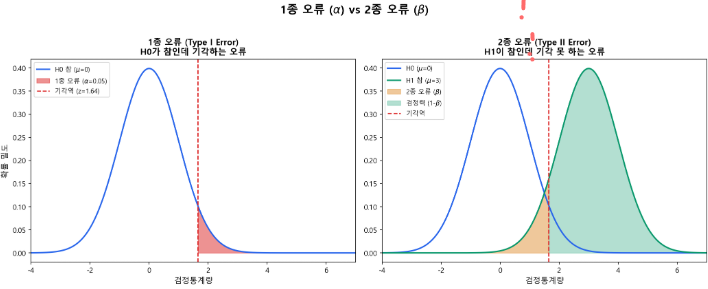

In [4]:
# 검정력 분석 실습
print("\n" + "=" * 60)
print("검정력 분석")
print("=" * 60)

print("\n[시나리오] 신약 혈압 강하 효과")
print("귀무가설: μ = 0 (효과 없음)")
print("대립가설: μ = -5 (혈압 5mmHg 강하)")
print("σ = 15, α = 0.05, 단측검정")

mu_0 = 0
mu_1 = -5
sigma = 15
alpha = 0.05

# ─────────────────────────────────────────────
# 수동 계산: 표본크기별 검정력
# ─────────────────────────────────────────────
print("\n[표본크기별 검정력] (수동 계산)")
print("-" * 45)
print(f"{'n':>6} {'SE':>10} {'검정력':>10} {'평가':>10}")
print("-" * 45)

for n in [10, 20, 30, 50, 100, 200]:
    se = sigma / np.sqrt(n)
    df = n - 1

    # TODO: 기각역 계산 (좌측검정, t-분포: stats.t.ppf(alpha, df))
    t_crit = stats.t.ppf(alpha, df=df)
    
    # TODO: 기각 임계값 x_crit = mu_0 + t_crit * se
    x_crit = mu_0 + t_crit * se # 표본 평균의 기각 임계값
    
    # TODO: 검정력 계산: H1 하에서 기각역에 들어갈 확률
    power = stats.t.cdf(x_crit, df=df, loc=mu_1, scale=se)
    
    # TODO: 결과 출력
    print(n, se, power)


검정력 분석

[시나리오] 신약 혈압 강하 효과
귀무가설: μ = 0 (효과 없음)
대립가설: μ = -5 (혈압 5mmHg 강하)
σ = 15, α = 0.05, 단측검정

[표본크기별 검정력] (수동 계산)
---------------------------------------------
     n         SE        검정력         평가
---------------------------------------------
10 4.743416490252569 0.22798092434988596
20 3.3541019662496843 0.40705362228174036
30 2.7386127875258306 0.5499404668052478
50 2.1213203435596424 0.7502956636642895
100 1.5 0.9512520133576181
200 1.0606601717798212 0.998746753083792


In [ ]:
# ─────────────────────────────────────────────
# 라이브러리 검증: statsmodels TTestPower
# ─────────────────────────────────────────────
from statsmodels.stats.power import TTestPower

analysis = TTestPower()

# TODO: Cohen's d 계산 (|mu_1 - mu_0| / sigma)
d = abs(mu_1 - mu_0) / sigma

# TODO: 표본크기별 수동 vs 라이브러리 검정력 비교
for n in [10, 20, 30, 50, 100, 200]:
    se = sigma / np.sqrt(n)
    df = n - 1

    # TODO: 기각역 계산 (좌측검정, t-분포: stats.t.ppf(alpha, df))
    t_crit = stats.t.ppf(alpha, df=df)
    
    # TODO: 기각 임계값 x_crit = mu_0 + t_crit * se
    x_crit = mu_0 + t_crit * se # 표본 평균의 기각 임계값
    
    # TODO: 검정력 계산: H1 하에서 기각역에 들어갈 확률
    power = stats.t.cdf(x_crit, df=df, loc=mu_1, scale=se)
    
    #일반 t분포로 계산하지 않음
    # 비중심 t-분포로 검정력을 더 정확히 계산
    power_lib = analysis.solve_power( #공식문서 참고
        effect_size=d, #효과 크기
        nobs = n, #표본 크기
        alpha = alpha, #유의 수준
        alternative = 'larger'
    )
    # solve_power 함수 특징이 3개의 인자를 주면 나머지 하나를 역산
    # 4개중에 3개를 입력하면 나머지 하나를 역산 effect_size, nobs, alpha, power
    
    # TODO: 결과 출력
    print(f"{power:.2f}, {power_lib:.2f}")
    print(power_lib)

0.23, 0.25
0.2516636113056667
0.41, 0.42
0.4178513938338987
0.55, 0.55
0.5549038213460186
0.75, 0.75
0.7515644412622811
0.95, 0.95
0.9521003975405028
1.00, 1.00
0.998867511733026


: 

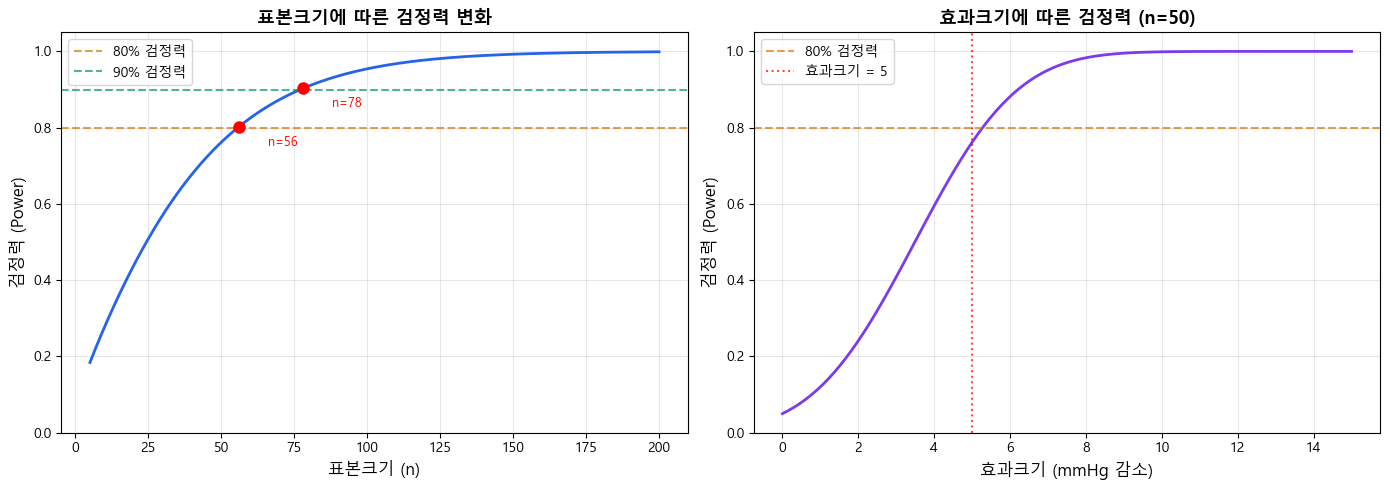

In [21]:
# 시각화: 검정력 곡선
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# (1) 표본크기 vs 검정력
n_range = np.arange(5, 201)
powers = []
for n in n_range:
    se = sigma / np.sqrt(n)
    z_crit = stats.norm.ppf(alpha)
    x_crit = mu_0 + z_crit * se
    power = stats.norm.cdf(x_crit, loc=mu_1, scale=se)
    powers.append(power)

axes[0].plot(n_range, powers, color='#2563EB', linewidth=2)
axes[0].axhline(0.80, color='#D97706', linestyle='--', alpha=0.7, label='80% 검정력')
axes[0].axhline(0.90, color='#059669', linestyle='--', alpha=0.7, label='90% 검정력')

for target_power in [0.80, 0.90]:
    for n in n_range:
        se = sigma / np.sqrt(n)
        z_crit = stats.norm.ppf(alpha)
        x_crit = mu_0 + z_crit * se
        p = stats.norm.cdf(x_crit, loc=mu_1, scale=se)
        if p >= target_power:
            axes[0].plot(n, p, 'o', markersize=8, color='red')
            axes[0].annotate(f'n={n}', xy=(n, p), xytext=(n+10, p-0.05),
                             fontsize=9, color='red')
            break

axes[0].set_xlabel('표본크기 (n)', fontsize=12)
axes[0].set_ylabel('검정력 (Power)', fontsize=12)
axes[0].set_title('표본크기에 따른 검정력 변화', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)
axes[0].set_ylim(0, 1.05)

# (2) 효과크기 vs 검정력 (n=50 고정)
n_fixed = 50
effect_sizes = np.linspace(0, 15, 100)
powers_effect = []
for eff in effect_sizes:
    se = sigma / np.sqrt(n_fixed)
    z_crit = stats.norm.ppf(alpha)
    x_crit = mu_0 + z_crit * se
    power = stats.norm.cdf(x_crit, loc=mu_0 - eff, scale=se)
    powers_effect.append(power)

axes[1].plot(effect_sizes, powers_effect, color='#7C3AED', linewidth=2)
axes[1].axhline(0.80, color='#D97706', linestyle='--', alpha=0.7, label='80% 검정력')
axes[1].axvline(5, color='red', linestyle=':', alpha=0.7, label='효과크기 = 5')
axes[1].set_xlabel('효과크기 (mmHg 감소)', fontsize=12)
axes[1].set_ylabel('검정력 (Power)', fontsize=12)
axes[1].set_title(f'효과크기에 따른 검정력 (n={n_fixed})', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(alpha=0.3)
axes[1].set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

In [ ]:
# ── solve_power 역산 기능: 4개 중 3개를 주면 나머지 1개를 구해줍니다 ──
print("\n[실습] solve_power 역산 기능")
print("=" * 60)
print("TTestPower.solve_power는 4개 인자 중 1개를 None으로 두면")
print("나머지 3개로부터 해당 값을 역산해줍니다.")
print("  → effect_size, nobs, alpha, power 중 하나를 구할 수 있습니다.")

from statsmodels.stats.power import TTestPower

analysis = TTestPower()
d = abs(mu_1 - mu_0) / sigma
print(f"Cohen's d ={d}")

# ─────────────────────────────────────────────
# (1) 검정에 필요한 표본크기 역산: "80% 검정력을 달성하려면 n이 몇 명 필요한가?" # 가설 설계 중요
# ─────────────────────────────────────────────
print(f"\n[1] 필요 표본크기 역산 (가장 많이 쓰는 기능)")
print("-" * 50)

for target_power in [0.80, 0.90, 0.95]:
    # TODO: 결과 출력
    n_req = analysis.solve_power( #공식문서 참고
    
        effect_size=d, #효과 크기
        alpha = alpha, #유의 수준
        power = target_power,
        alternative = 'larger' # 단측검정
    )
    print(target_power, np.ceil(n_req))

# ─────────────────────────────────────────────
# (2) 검정력 계산: "n=50일 때 검정력은?"
# ─────────────────────────────────────────────
print(f"\n[2] 검정력 계산")
print("-" * 50)
# TODO: 결과 출력
power = analysis.solve_power( #공식문서 참고

    effect_size=d, #효과 크기
    alpha = alpha, #유의 수준
    nobs = 50,
    alternative = 'larger' # 단측검정
)
print(power) #0.75

# ─────────────────────────────────────────────
# (3) 탐지 가능한 최소 효과크기: "n=50으로 탐지할 수 있는 최소 효과는?"
# ─────────────────────────────────────────────
print(f"\n[3] 탐지 가능한 최소 효과크기 역산")
print("-" * 50)

# TODO: 결과 출력
d_min = analysis.solve_power( #공식문서 참고
    alpha = alpha, #유의 수준
    nobs = 50,
    power = 0.8,
    alternative = 'larger' #단측검정
) 
print(d_min) # 0.35

# ─────────────────────────────────────────────
# (4) 실전 활용: 연구 설계 시 표본크기 결정
# ─────────────────────────────────────────────
print(f"\n[4] 실전 활용: 효과크기별 필요 표본크기 비교")
print("-" * 55)
print(f"  '혈압 몇 mmHg 차이를 탐지하고 싶은가?'에 따라 필요 n이 달라집니다")
print(f"  (검정력 80%, α = 0.05, σ = {sigma} 기준)")
print(f"{'효과(mmHg)':>12} {'Cohen d':>10} {'필요 n':>10} {'효과 해석':>12}")
print("-" * 55)

for effect_mmhg in [2, 3, 5, 8, 10]:
    # TODO: Cohen's d 계산 
    d = effect_mmhg / sigma # 대응표본에서의 효과크기
    
    # TODO: solve_power로 필요 n 역산
    n_req = analysis.solve_power( #공식문서 참고
    effect_size=d,
    alpha = alpha, #유의 수준
    power = 0.8,
    alternative = 'larger' #단측검정
    )

    # TODO: 결과 출력
    print (effect_mmhg, np.ceil(n_req))
    
    
# statsmodels의 alternative 옵션은 effect_size의 부호 기준으로 방향을 잡는다.
# d = +0.333 + alternative='larger' → 효과가 양의 방향으로 있다고 검정 → 검정력 계산 O
# d = -0.333 + alternative='smaller' → 효과가 음의 방향으로 있다고 검정 → 같은 결과
# 두 가지 방법 모두 같은 검정력이 나옵니다.
# 검정력 계산에서는 좌측, 우측 단측이 방향만 맞으면 결과가 같기 때문에, 관례적으로 d를 양수로 넣고 'larger'를 쓰는 경우가 많습니다.


[실습] solve_power 역산 기능
TTestPower.solve_power는 4개 인자 중 1개를 None으로 두면
나머지 3개로부터 해당 값을 역산해줍니다.
  → effect_size, nobs, alpha, power 중 하나를 구할 수 있습니다.
Cohen's d =0.3333333333333333

[1] 필요 표본크기 역산 (가장 많이 쓰는 기능)
--------------------------------------------------
0.8 58.0
0.9 79.0
0.95 99.0

[2] 검정력 계산
--------------------------------------------------
0.7515644412622811

[3] 탐지 가능한 최소 효과크기 역산
--------------------------------------------------
0.3565996544505667

[4] 실전 활용: 효과크기별 필요 표본크기 비교
-------------------------------------------------------
  '혈압 몇 mmHg 차이를 탐지하고 싶은가?'에 따라 필요 n이 달라집니다
  (검정력 80%, α = 0.05, σ = 15 기준)
    효과(mmHg)    Cohen d       필요 n        효과 해석
-------------------------------------------------------
2 350.0
3 156.0
5 58.0
8 24.0
10 16.0


---

### 핵심 정리 요약

| 개념                | 한 줄 요약                                                    |
|---------------------|---------------------------------------------------------------|
| **표본분포**        | 표본평균이 따르는 분포, n이 클수록 좁아진다                   |
| **중심극한정리**    | n ≥ 30이면 모집단 분포와 관계없이 표본평균은 정규분포에 수렴  |
| **신뢰구간**        | 모수를 포함할 것으로 기대하는 구간 (95%: 100번 중 95번 포함)  |
| **가설검정**        | H₀를 가정 → 데이터로 증거 평가 → p-value로 판정              |
| **p-value**         | H₀ 하에서 이 결과가 얼마나 드문지를 나타내는 확률             |
| **1종/2종 오류**    | 1종: 없는데 있다고 (α) / 2종: 있는데 없다고 (β)              |
| **검정력**          | 진짜 효과를 탐지할 능력 (1-β), 최소 80% 권장                 |
| **효과크기**        | 차이의 실질적 크기 (p-value와 별개로 항상 보고해야 함)        |

#### 실전 가설검정 프로세스 체크리스트

| 단계 | 체크 항목                    | 주의 사항                                          |
|------|------------------------------|----------------------------------------------------|
| 1    | 연구 질문 명확화             | 무엇을 알고 싶은지 구체적으로 정의                 |
| 2    | 가설 설정 (H₀, H₁)         | 연구 질문에 맞는 적절한 가설 설정                   |
| 3    | 유의수준 α 설정             | 데이터를 보기 **전에** 결정 (보통 0.05)             |
| 4    | 적절한 검정 방법 선택        | 데이터 유형, 표본 수, 가정 확인                     |
| 5    | 가정 확인                    | 정규성, 등분산성, 독립성 등                         |
| 6    | 검정 실행                    | 검정통계량, p-value 계산                            |
| 7    | 결론 도출                    | p ≤ α → 기각, p > α → 기각 실패                   |
| 8    | 효과크기 보고                | 통계적 유의성 + 실질적 의미 함께 판단               |
| 9    | 신뢰구간 제시                | 점추정값과 함께 구간추정 결과 보고                  |
| 10   | 한계점 인식                  | 표본크기, 가정 위반, 다중검정 문제 등 고려          |

> **"통계적으로 유의하다" ≠ "실질적으로 중요하다"** — 반드시 효과크기와 맥락을 함께 고려해야 합니다!

---

# 실습 완료!

이것으로 3회차 이론 실습이 끝났습니다.

**실습 과제**는 `practice_03_assignment.ipynb` 파일에서 풀어보세요.

| 문제     | 주제                 | 핵심 개념                                       |
|----------|----------------------|-------------------------------------------------|
| 문제 1   | 신뢰구간 계산        | 점추정, 구간추정, 신뢰수준, 표본크기 결정        |
| 문제 2   | 단일표본 검정        | 가설 설정, t-검정, p-value 해석, 결론 도출       |
| 문제 3   | 두 그룹 비교         | 독립표본 t-검정, 효과크기, 단일 vs 독립 vs 대응 구분     |
| 문제 4   | 전후 비교와 검정력   | 대응표본 t-검정, 검정력     |

In [ ]:
# 추가된 코드 옮겨주기
# 내용에 alternative = 추가하기